In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append("..")
sys.path.append("../InverseProblem/inverse_scripts/")
import inverse_gnn
import utils
import torch
from glob import glob
import modules
import gnn_module
import dataio
from functools import partial

device = "cuda:0"

### config

In [3]:
data_file = "../data/data/coarse_valid"
path_to_data = "../data/"
loss_fn = "l1"
time_steps = [30]
sensor_num = 20
start_observation_index = 2
obversation_step = 2
num_iter = 2000

progressive = True
repeat_time = 50

edge_features = ['dist','direction']
node_features=('u', 'v', 'density', 'type')

### load dataset

In [4]:
solver_path = os.path.join(path_to_data,"model_zoo/gnn_solver_3136000.pth")
gnn_solver = gnn_module.mesh_PDE(edge_dim=3,node_dim=4, latent_dim = 256,num_steps=10,layer_norm=True,
                                nl='relu',var=0,batch_norm=False,normalize=True,encoder_nl='relu',
                                diffMLP=True).to(device)
checkpoint_gnn = torch.load(solver_path,map_location=device)
gnn_solver.load_state_dict(checkpoint_gnn['model_state_dict'])
graph_update_fn = partial(dataio.wave_data_update,('u', 'v', 'density','type'))

### load prior

In [5]:
prior = modules.CoordinateNet_autodecoder(latent_size=64, nl='relu', in_features=64+2, out_features=1,
                                hidden_features=256,
                                num_hidden_layers=6, num_pe_fns=3,
                                w0=60,use_pe=True,skip_connect=None,dataset_size=10000,
                                outmost_nonlinearity="sigmoid",outermost_linear=False).to(device)

prior_path = os.path.join(path_to_data,"model_zoo/prior.pth")
checkpoint_prior = torch.load(prior_path,map_location=device)
prior.load_state_dict(checkpoint_prior)
prior.lat_vecs = None

### inverse problem without prior

steps [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30]
iter: 0
loss:0.050937213003635406
mse:0.9316622018814087


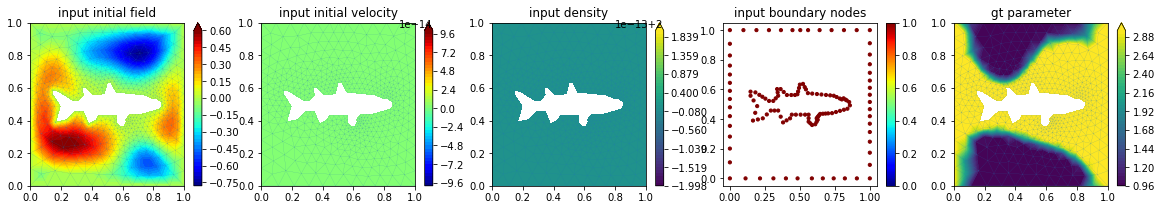

iter: 500
loss:0.021176256239414215
mse:0.6020781993865967


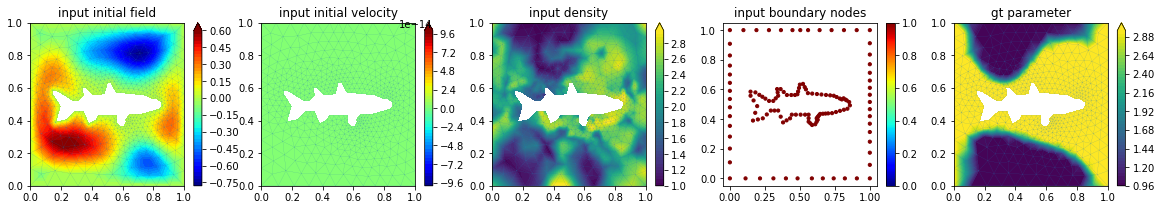

iter: 1000
loss:0.010530419647693634
mse:0.5671303272247314


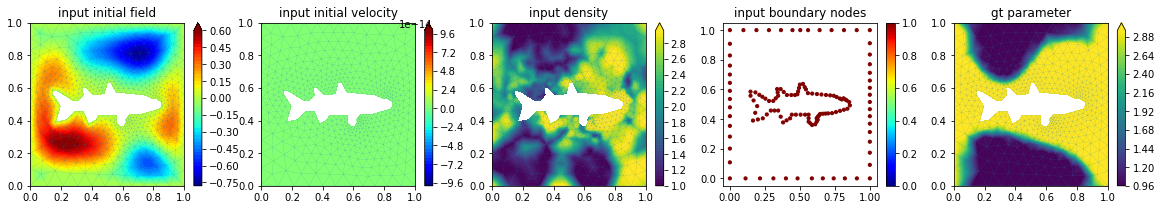

iter: 1500
loss:0.008540024980902672
mse:0.5491830110549927


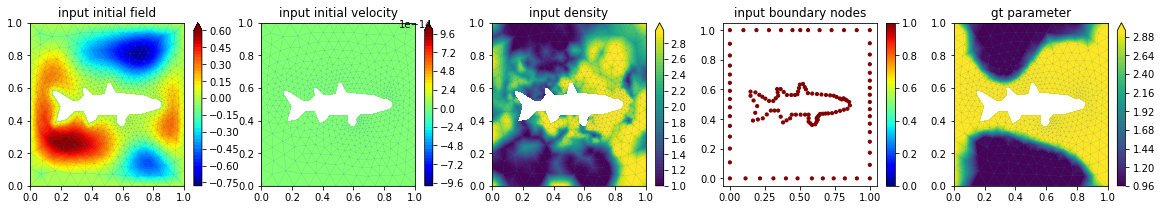

 iter:  1999
 masked:0.036101084202528 
loss:0.006751650013029575 
mse:0.5227240324020386 


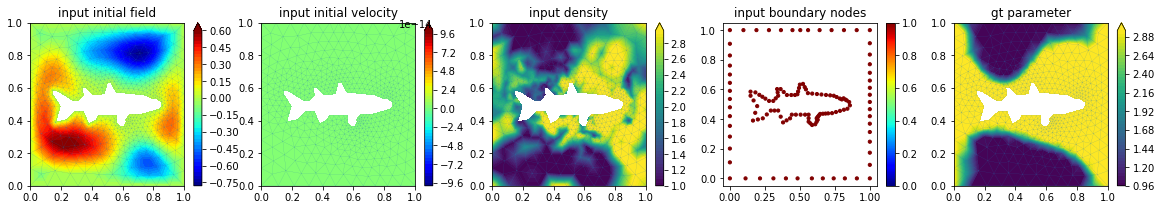

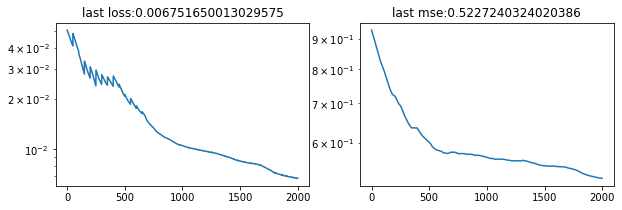

In [7]:
lr = 0.001
lr_decay = 1
lr_decay_steps = 1000
reg = 0
resolution = 64 ##?
log_path = "./log/density/"
store = True
mse_vs_time = os.path.join(log_path, "mse_vs_time")
run_time = os.path.join(log_path, "run_time")
individual_npy = os.path.join(log_path, "individual_npy")
gradient_norms = os.path.join(log_path, "gradient_norms")

utils.cond_mkdir(log_path)
utils.cond_mkdir(mse_vs_time)
utils.cond_mkdir(run_time)
utils.cond_mkdir(individual_npy)
utils.cond_mkdir(gradient_norms)

noprior = True
prior_type = "density"
gradient_clip = 0.01


inverse_gnn.test_inverse(start_index=0,dataset_size=1,prior=prior,gnn_solver=gnn_solver,
                         graph_update_fn=graph_update_fn,time_steps=time_steps,
                        sensor_num=sensor_num,num_iter=num_iter,lr=lr,lr_decay=lr_decay,lr_decay_steps=lr_decay_steps,
                         resolution=resolution,log_path=log_path,store=store,data_file=data_file,
                         edge_features=edge_features,prior_type=prior_type,
                        noprior = noprior,loss_fn=loss_fn, progressive=progressive, repeat_time=repeat_time,
                         convergence_stop=True,path_to_data=path_to_data,obversation_step= obversation_step,
                         start_observation_index=start_observation_index,mask_type="random_nodes",
                         gradient_clip=gradient_clip,lr_decay_type="per_iter",reg=reg,device=device)


### inverse problem with prior

steps [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30]
iter: 0
loss:0.06726767867803574
mse:1.4279199838638306


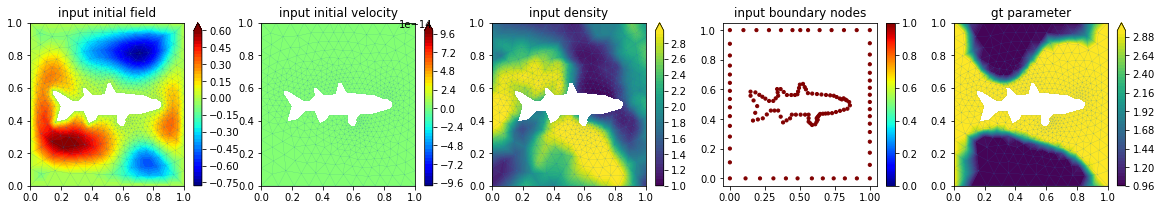

iter: 500
loss:0.0028104130178689957
mse:0.04659368470311165


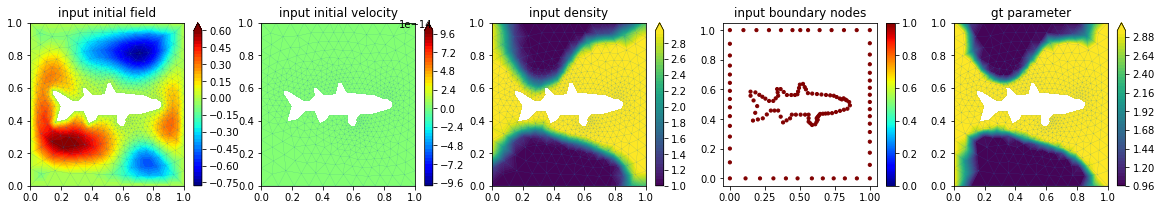

iter: 1000
loss:0.0028748814947903156
mse:0.04619274660944939


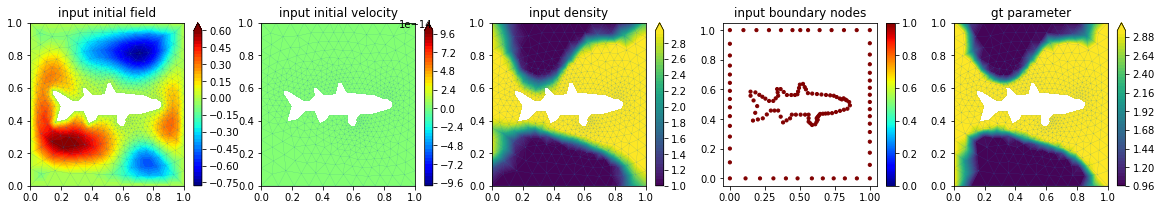

iter: 1500
loss:0.002081566024571657
mse:0.036072902381420135


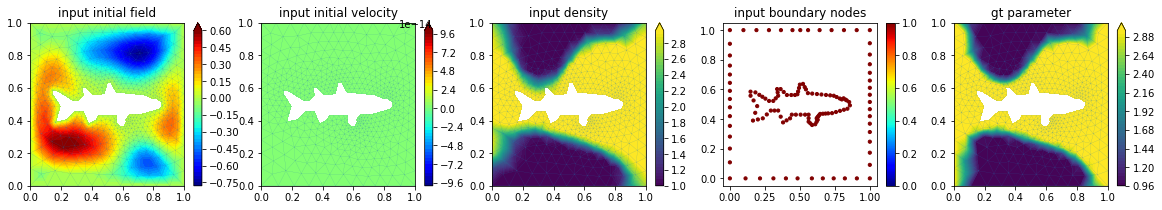

 iter:  1999
 masked:0.036101084202528 
loss:0.0020527727901935577 
mse:0.038502223789691925 


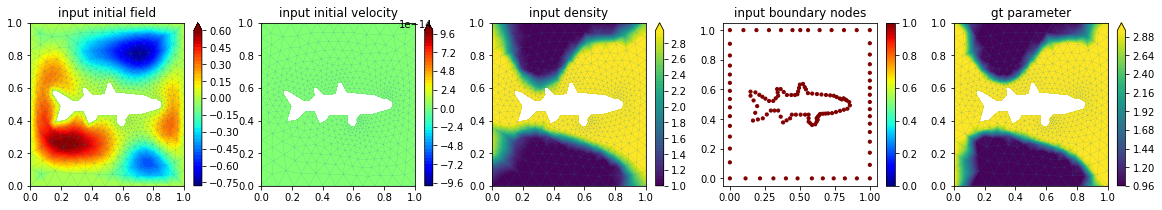

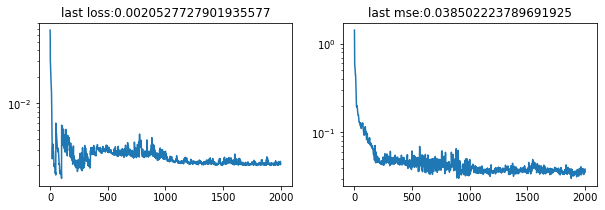

In [8]:
lr = 0.005
lr_decay = 0.5
lr_decay_steps = 1000
reg = 0.01
resolution = 64 ##?
log_path = "./log/density/"
store = True

noprior = False
prior_type = "density"
gradient_clip = 0.01


inverse_gnn.test_inverse(start_index=0,dataset_size=1,prior=prior,gnn_solver=gnn_solver,
                         graph_update_fn=graph_update_fn,time_steps=time_steps,
                        sensor_num=sensor_num,num_iter=num_iter,lr=lr,lr_decay=lr_decay,lr_decay_steps=lr_decay_steps,
                         resolution=resolution,log_path=log_path,store=store,data_file=data_file,
                         edge_features=edge_features,prior_type=prior_type,
                        noprior = noprior,loss_fn=loss_fn, progressive=progressive, repeat_time=repeat_time,
                         convergence_stop=True,path_to_data=path_to_data,obversation_step= obversation_step,
                         start_observation_index=start_observation_index,mask_type="random_nodes",
                         gradient_clip=gradient_clip,lr_decay_type="per_iter",reg=reg,device=device)
